In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
class GoldAnalysis():
    """
        analysis of the price of gold in relation to the increase in the monetary base.
    """
    def __init__(self):
        self.path_gold_price = r'../data/dataframe_gold_price.csv'
        self.path_m2sl = r'../data/dataframe_M2SL.csv'

        self.df_gold_price = pd.read_csv(
            self.path_gold_price
        )

        self.path_m2sl = pd.read_csv(
            self.path_m2sl
        )

    def infos(self):
        print(self.path_m2sl['M2SL'].describe())

    def grafico_de_linha(self):
        figure = plt.figure(
            figsize=(10, 8)
        )

        plt.plot(
            self.df_gold_price['Year'],
            self.df_gold_price['Average_Price'],
        )

        plt.savefig('../img/grafico_de_linha.png')

    
    def media_da_expanção_do_m2_por_ano(self):
        """
            Antes:
                DATE,M2SL
                1959-01-01,286.6
                1959-02-01,287.7
                1959-03-01,289.2
                1959-04-01,290.1
                1959-05-01,292.2
                1959-06-01,294.1
                1959-07-01,295.2
                1959-08-01,296.4
                1959-09-01,296.7
                1959-10-01,296.5
                1959-11-01,297.1
                1959-12-01,297.8

            Depois:
                year, average_m2
                1950, 295.2
        """
        pass

    def medir_o_aumento_da_base_monetaria_por_ano_em_porcentagem(self):
        """
            A parti da média do m2 de 1959, quais foram os aumentos 
            tendo como base o m2 do ano anterio.

            Exemplo:
                DATE,M2SL
                1959 ,286.6 - 0%  _
                1960 ,312.4 - 30% _|
                1961 ,335.5 - 10% _|
        """
        pass

    def agrupando_dados_do_aumento_do_preço_do_ouro_aparti_de_1959_com_o_aumento_do_m2_até_2016(self):
        """
            colunas:
                year, average_m2, average_gold_price
                1959, 286.6, 35.10
                ...
                2016, 13209.6, 1250.74
        """
        pass

        

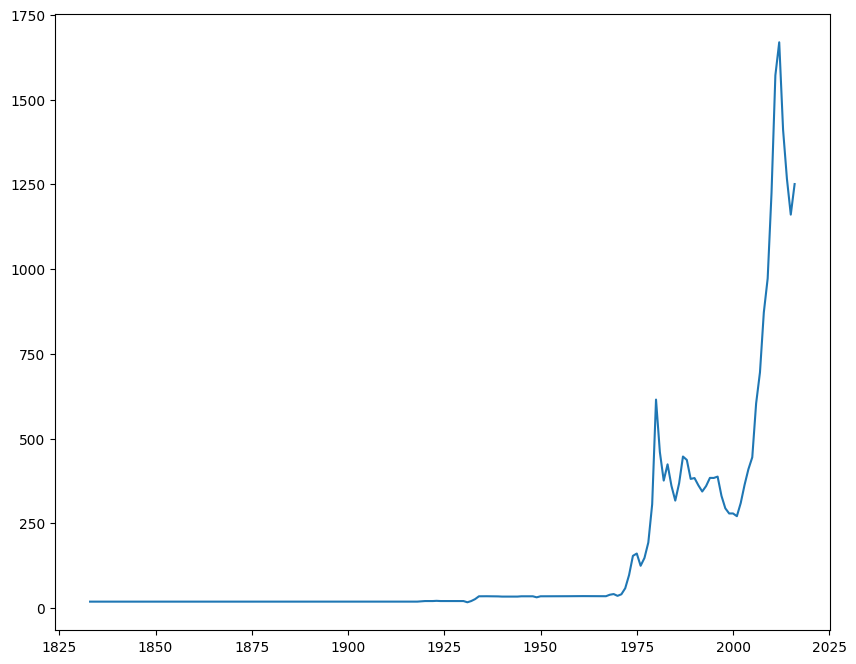

In [21]:
if __name__ == "__main__":
    gold_analysis = GoldAnalysis()
    gold_analysis.grafico_de_linha()